# **Time Series Forecasting with ARIMA Model**

ARIMA - Auto Regressive Integrated Moving Average

An ARIMA model is characterized by 3 terms: p, d, q
<br><br>
* **AR (p) Autoregression:** An auto regressive AR(p) term refers to the number of lags of Y to be used as predictors. In other words, the number of terms that are used from the past values in the time series for forecasting the future values. It's the part of the model that captures the relationship between a current observation and its predecessors. A high *p* value can indicate a strong influence of past values on current values.
<br><br>
* **I (d) Integration:** This parameter indicates the number of times the original time series data should be differenced to make it stationary. Stationarity is a critical aspect of time series analysis where the statistical properties of the series (mean, variance) do not change over time. Differencing is a method of transforming a non-stationary time series into a stationary one by subtracting the previous observation from the current observation. The *d* value helps in removing trends and seasonal structures from the time series, making it easier to model.
<br><br>
* **MA (q) Moving Average:**  ‘q’ is the order of the ‘Moving Average’ (MA) term. 'q' refers to the number of past errors (residuals) that are used to improve forecasts. The MA component models the relationship between an observation and a residual error from a moving average model applied to lagged observations. In simpler terms, it accounts for the influence of past prediction errors on the current observation. The errors referred to here are the differences between the actual values and the predictions that a simple moving average model would have made. The choice of *q* has a direct impact on how the ARIMA model predicts future values by considering how past errors influence current predictions. It helps in capturing the autocorrelation in the residuals of the series that is not explained by the autoregressive (AR) part.
<br><br>

### Model Types:

**ARIMA** - Non-seasonal auto regressive integrated moving average

<span style="color:crimson">**ARIMAX** - ARIMA with exogenous variable</span>

**SARIMA** - Seasonal ARIMA

**SARIMAX** - Seasonal ARIMA with exogenous variable

In [104]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [105]:
# load the dataset.
# This dataset contains the stock price for 'Apple' and the stock price for 'TXN'
data = pd.read_csv('C:\\Users\\Vasan\\#Data science python\\DS LEVEL 2\\DSFINAL PROJECT\\Apple Stock Price Forecasting\\Dataset\\AAPL.csv')
print(data.dtypes)

Date     object
AAPL    float64
TXN     float64
dtype: object


The column `Date` is an 'object'. We need to change it to `datetime` data type.

In [106]:
# convert 'Date' to datetime type
data['Date'] = pd.to_datetime(data['Date'])


In [107]:
# check the datatype
print(data.dtypes)

Date    datetime64[ns]
AAPL           float64
TXN            float64
dtype: object


In [108]:
data

,Date,AAPL,TXN
0,2022-01-01,174.780000,177.210000
1,2022-02-01,165.119995,169.990005
2,2022-03-01,174.610001,183.479996
3,2022-04-01,157.649994,170.250000
4,2022-05-01,148.839996,176.759995
5,2022-06-01,136.720001,153.649994
6,2022-07-01,162.509995,178.889999
7,2022-08-01,157.220001,165.210007
8,2022-09-01,138.199997,154.779999
9,2022-10-01,153.339996,160.630005


**AAPL** - Ticker symbol for Apple Inc. and it is traded on the NASDAQ stock exchange.<br>
**TXN** - Ticker symbol for Texas Instruments (TXN): Major supplier for Apple known to supply Apple with several critical components used in Apple's products. One of the main components supplied by Texas Instruments to Apple is semiconductor chips, particularly for power management. These chips are crucial for managing battery life and power consumption in Apple's devices such as iPhones, iPads, and MacBooks.

# Univariate - Using only one variable

In [109]:
# Univariate analysis - We will only use 'Apple' variable.
df = data.iloc[:-2,0:2]

In [110]:
# check the data
df.tail()

,Date,AAPL
19,2023-08-01,187.869995
20,2023-09-01,171.210007
21,2023-10-01,170.770004
22,2023-11-01,189.949997
23,2023-12-01,192.529999


In [111]:
# set the 'Date' column as index
df = df.set_index('Date')

[Text(18993.0, 0, '2022-01'),
 Text(19083.0, 0, '2022-04'),
 Text(19174.0, 0, '2022-07'),
 Text(19266.0, 0, '2022-10'),
 Text(19358.0, 0, '2023-01'),
 Text(19448.0, 0, '2023-04'),
 Text(19539.0, 0, '2023-07'),
 Text(19631.0, 0, '2023-10'),
 Text(19723.0, 0, '2024-01')]

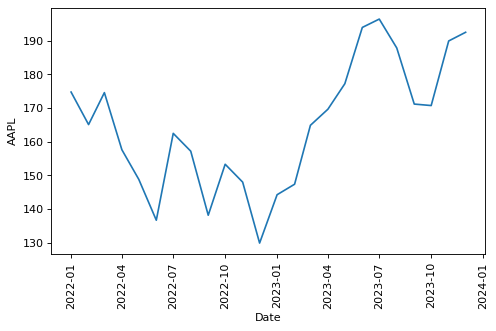

In [112]:
#create seaborn lineplot
plot = sns.lineplot(df['AAPL'])

#rotate x-axis labels
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


### Decomposition

In [113]:
# Extract and plot trend, seasonal and residuals.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(df['AAPL'])

In [114]:
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

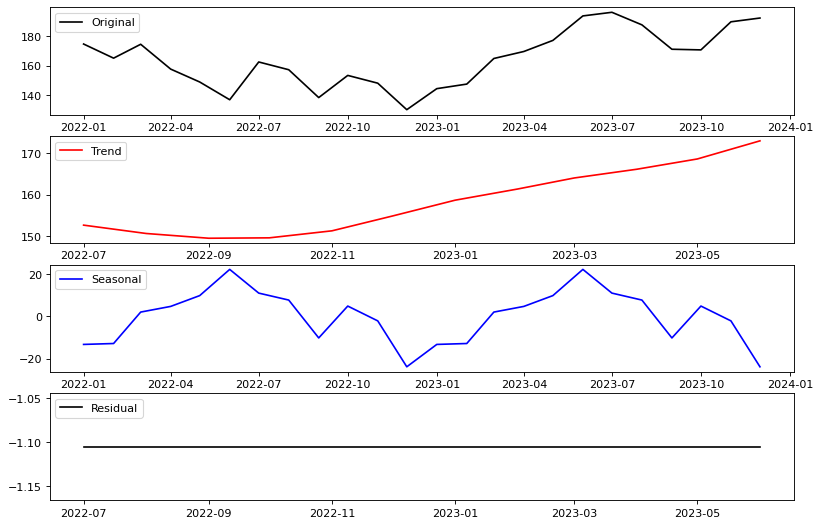

In [115]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(df['AAPL'], label='Original', color='black')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='black')
plt.legend(loc='upper left')
plt.show()

If the **residual plot** is a straight line at a non-zero value (in this case, 2), it indicates the presence of some systematic bias or pattern in the residuals, which means the model is not accounting for all the information in the data. This could be due to various reasons such as missing variables, incorrect model selection, or a non-linear relationship between the variables.

<https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.ARIMA.html>

## **Find p, d, q**

### To find p and q use ACF and PACF plots from statsmodels library

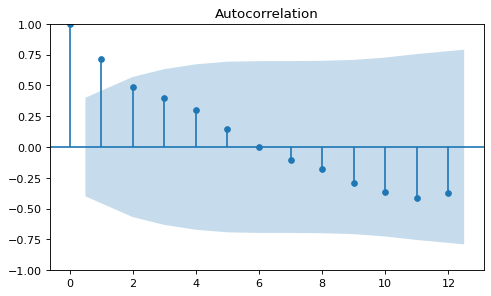

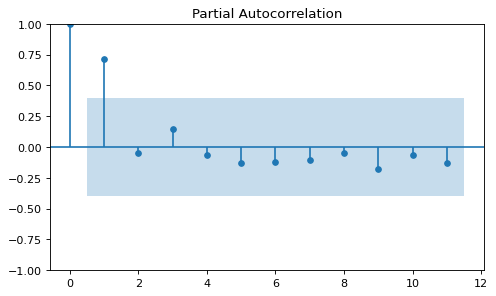

In [116]:
# for finding p,q using PACF and ACF plots respectively
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(7,4), 'figure.dpi':80})

# plot ACF
plot_acf(df['AAPL'].dropna());

# plot PACF
plot_pacf(df['AAPL'].dropna(), lags=11);

plt.show()

**q** is given by the ACF plot, where you count the number of spikes outside of the confidence interval (blue area). The first one which is 0, is the current value which will always be correlated to itself i.e. value is 1. In this case we only 1 spike outside the confidence interval. Therefore, `q = 1`


**p** is given by the PACF plot, where you count the number of spikes outside of the confidence interval (blue area). The first one which is 0, is the current value which will always be correlated to itself i.e. value is 1. In this case we only have 1 spike outside the confidence interval. Therefore, `p = 1`
That spike value in pacf (i.e. 0.76 are the coeficient values (beta1, beta2, etc.) in the linear regression equation)

We can use `q = 1` and `p = 1`

The key difference between the **Partial Autocorrelation Function (PACF)** and the **Autocorrelation Function (ACF)** is that the **PACF** measures the relationship between a time series and its lagged values after removing the effects of the intervening lags, while the **ACF** measures the relationship between a time series and its lagged values without removing the effects of the intervening lags.

For example, let's say we have a time series of monthly sales data for a store. If we are considering the correlation between sales in January and sales in March, then February is the intervening lag. The effect of the February sales on the correlation between January and March sales is accounted for when we use the PACF, as it controls for the effect of the intervening lags.

### To find d, we have to first check if the series is stationary



The first step to build an ARIMA model is to make the time series stationary.

Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, work best when the predictors are not correlated and are independent of each other.

To make a series stationary, the most common approach is to difference (d) it. The value of `d`, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

In [117]:
# Augmented Dickey-Fuller (ADF) test to check if the data is stationary. We already know it is not by looking at the chart above.
from statsmodels.tsa.stattools import adfuller

In [118]:
# if p value < 0.05 the series is stationary
results = adfuller(df['AAPL'])
print('p-value:', results[1]) # adf, pvalue, usedlag_, nobs_, critical_values_, icbest_

p-value: 0.5757695819593229


STEPS:
* First check the p-value. If p-value is <0.05, your series is stationary.
* If not, do a first order differencing
* Perform the ADF test on the differenced series to check the p-value
* If p-value is <0.05, your series is stationary
* If not, do a second order differencing.
* Whatever order of differencing you do, that will be your value of 'd' in ARIMA model

p-value is 0.99. Therefore, the series is **not stationary**. Therefore, we will need to make it stationary.

### Differencing - To make series stationary

In [119]:
# 1st order differencing
v1 = df['AAPL'].diff().dropna()

# adf test on the new series. if p value < 0.05 the series is stationary
results1 = adfuller(v1)
print('p-value:', results1[1]) # adf, pvalue, usedlag_, nobs_, critical_values_, icbest_

p-value: 2.83738733381343e-05


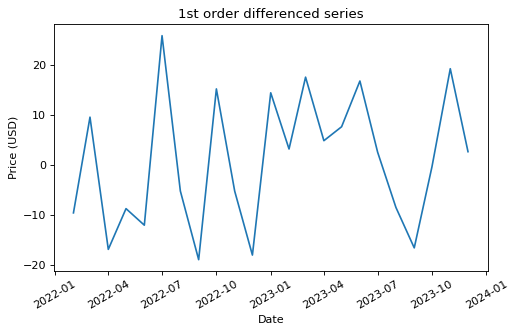

In [120]:
# Plot the differenced series
plt.plot(v1)
plt.title('1st order differenced series')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Price (USD)')
plt.show()

In [121]:
# the mean for above series is
(v1.values).mean()

0.7717390869565218

The right order of differencing is the minimum differencing required to get a near-stationary series.

In [122]:
# if reqired, 2nd order differencing would be
# v2 = v1.diff().dropna()
# results2 = adfuller(v2)
# print('p-value:', results2[1]) # adf, pvalue, usedlag_, nobs_, critical_values_, icbest_

## **Training and Forecasting**

In [123]:
# Use statsmodels 0.11 or later
# to check the version after import use: print(statsmodels.__version__)
# to upgrade use: !pip install statsmodels --upgrade

# Install statsmodel
#!pip install statsmodels==0.13
import statsmodels

In [124]:
# Import ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

In [125]:
# 1,1,1 ARIMA Model
arima = ARIMA(df.AAPL, order=(1,1,1))
ar_model = arima.fit()
print(ar_model.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -91.365
Date:                Sun, 04 Aug 2024   AIC                            188.731
Time:                        16:30:36   BIC                            192.137
Sample:                    01-01-2022   HQIC                           189.588
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8451      0.522      1.618      0.106      -0.179       1.869
ma.L1         -0.9996     76.418     -0.013      0.990    -150.777     148.777
sigma2       157.6719    1.2e+04      0.013      0.9

### 1. Coefficients:

**ar.L1 (AR coefficient at lag 1):** The coefficient value 0.8450 with a standard error 0.522 suggests the presence of an autoregressive term of order 1. However, the p-value (P>|z|) is 0.106, which is greater than the typical significance level of 0.05, indicating that this coefficient is not statistically significant. <br><br>
**ma.L1 (MA coefficient at lag 1):** The coefficient value -0.9996 with a very large standard error 73.545 suggests a moving average effect. The p-value is very high (0.989), indicating that this coefficient is also not statistically significant.<br><br>
**sigma2:** This is the estimated variance of the error term, with a value of 157.6766. The standard error of this estimate is quite large relative to the coefficient.<br><br>


### 2. Goodness of Fit:

**Log Likelihood:** The value -91.365 indicates the log-likelihood of the model, which is a measure of the fit of the model to the data. It’s used for comparing different models; higher values indicate a better fit.<br><br>
**AIC (Akaike Information Criterion):** The value 188.731 is a measure used to compare models with a penalty for the number of parameters to prevent overfitting. Lower AIC values indicate a better model.<br><br>
**BIC (Bayesian Information Criterion):** Similar to AIC with a stricter penalty for the number of parameters, the BIC value is 192.137. Again, lower is better.<br><br>
**HQIC (Hannan-Quinn Information Criterion):** Another criterion for model selection, with a value of 189.588.

### 3. Diagnostics:

**Ljung-Box (Q):** Tests for lack of fit. A high p-value (0.91) suggests that there is little evidence of lack of fit in the model.<br><br>
**Jarque-Bera (JB):** Tests the assumption of normality of the residuals. A high p-value (0.52) suggests that the residuals are normally distributed.<br><br>
**Heteroskedasticity (H):** Tests whether the variance of the errors is constant across observations. A high p-value (0.58) suggests no heteroskedasticity.<br><br>


### 4. Interpretation:

* The model coefficients are not statistically significant (based on the p-values), which may imply that the model might not be the best fit for this data.

* The model diagnostics suggest that the residuals do not violate the assumptions of normality and constant variance, which is good. However, the model's predictive accuracy is in question due to the coefficient significance.

* The very large standard error for the MA coefficient suggests that there may be issues with the data or the model's specification.

Notice here the coefficient of the MA.L1 and MA.L2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

Insignificant p-values imply that the autoregressive and moving average terms are not statistically significant and therefore should be removed from the model.

Alternatively, it could mean that the model needs to be refined by including additional variables or using a different order of differencing or a higher order ARIMA model.

It's also possible that the data itself may not be suitable for modeling using an ARIMA model, and a different approach may be needed to model the time series.

In [126]:
# Forecast
forecast = ar_model.get_forecast(2)
ypred = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)

In [127]:
ypred

2024-01-01    189.136772
2024-02-01    186.269309
Freq: MS, Name: predicted_mean, dtype: float64

#### Check the actual values on Yahoo Finance

https://finance.yahoo.com/quote/AAPL/history?period1=1640908800&period2=1707868800&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true

In [128]:
# creating a new Dataframe dp with the prediction values.
Date = pd.Series(['2024-01-01', '2024-02-01'])
price_actual = pd.Series(['184.40','185.04'])
price_predicted = pd.Series(ypred.values)
lower_int = pd.Series(conf_int['lower AAPL'].values)
upper_int = upper_series = pd.Series(conf_int['upper AAPL'].values)

dp = pd.DataFrame([Date, price_actual, lower_int, price_predicted, upper_int], index =['Date','price_actual', 'lower_int', 'price_predicted', 'upper_int']).T
dp = dp.set_index('Date')
dp.index = pd.to_datetime(dp.index)
dp

,price_actual,lower_int,price_predicted,upper_int
Date,,,,
2024-01-01,184.40,164.180385,189.136772,214.093158
2024-02-01,185.04,153.149752,186.269309,219.388866


In [129]:
data = data.set_index('Date')

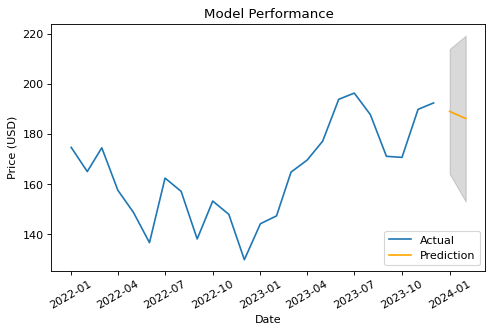

In [130]:
# Plot
plt.plot(data.AAPL)
plt.plot(dp.price_predicted, color='orange')
plt.fill_between(dp.index,
                 lower_int,
                 upper_int,
                 color='k', alpha=.15)


plt.title('Model Performance')
plt.legend(['Actual','Prediction'], loc='lower right')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Price (USD)')
plt.show()

In [131]:
# import evaluation matrices
from sklearn.metrics import mean_absolute_error

# Evaluate the model
print('ARIMA MAE = ', mean_absolute_error(dp.price_actual, dp.price_predicted))

ARIMA MAE =  2.9830404866150104


# Bivariate - Using the exogenous variable - **'TXN'**

In [132]:
# Bivariate analysis - We will use both 'Apple' and 'TexasIns' variables.
# Training data - January 2020 to January 2022
# Testing data - February 2022 - May 2022
dfx = data.iloc[0:-2,0:3]

In [133]:
dfx

,AAPL,TXN
Date,,
2022-01-01,174.780000,177.210000
2022-02-01,165.119995,169.990005
2022-03-01,174.610001,183.479996
2022-04-01,157.649994,170.250000
2022-05-01,148.839996,176.759995
2022-06-01,136.720001,153.649994
2022-07-01,162.509995,178.889999
2022-08-01,157.220001,165.210007
2022-09-01,138.199997,154.779999


In [134]:
# 1,1,1 ARIMAX Model with exogenous variable
model2 = ARIMA(dfx.AAPL, order=(1,1,1))
arimax = model2.fit()
print(arimax.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -91.365
Date:                Sun, 04 Aug 2024   AIC                            188.731
Time:                        16:30:36   BIC                            192.137
Sample:                    01-01-2022   HQIC                           189.588
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8451      0.522      1.618      0.106      -0.179       1.869
ma.L1         -0.9996     76.418     -0.013      0.990    -150.777     148.777
sigma2       157.6719    1.2e+04      0.013      0.9

In [135]:
# Forecast
forecast = arimax.get_forecast(steps=2)
ypred = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)


In [136]:
data.tail()

,AAPL,TXN
Date,,
2023-10-01,170.770004,142.009995
2023-11-01,189.949997,152.710007
2023-12-01,192.529999,170.460007
2024-01-01,NaN,160.119995
2024-02-01,NaN,156.850006


In [137]:
# we have the values for TXN
data.TXN.iloc[-2:]

Date
2024-01-01    160.119995
2024-02-01    156.850006
Name: TXN, dtype: float64

In [138]:
# put those values in a variable
ex = data.TXN.iloc[-2:].values
ex

array([160.119995, 156.850006])

In [139]:
# Forecast
forecast = arimax.get_forecast(2, exog=ex)
ypred = forecast.predicted_mean
conf_int = forecast.conf_int(alpha=0.05)

In [140]:
# creating a new Dataframe dp with the prediction values.
Year = pd.Series(['2024-01-01', '2024-02-01'])
price_actual = pd.Series(['184.40','185.04'])
price_predicted = pd.Series(ypred.values)
lower_int = pd.Series(conf_int['lower AAPL'].values)
upper_int = upper_series = pd.Series(conf_int['upper AAPL'].values)


dpx = pd.DataFrame([Date, price_actual, lower_int, price_predicted, upper_int], index =['Date','price_actual', 'lower_int','price_predicted','upper_int' ]).T
dpx = dpx.set_index('Date')
dpx.index = pd.to_datetime(dpx.index)
dpx

,price_actual,lower_int,price_predicted,upper_int
Date,,,,
2024-01-01,184.40,164.180385,189.136772,214.093158
2024-02-01,185.04,153.149752,186.269309,219.388866


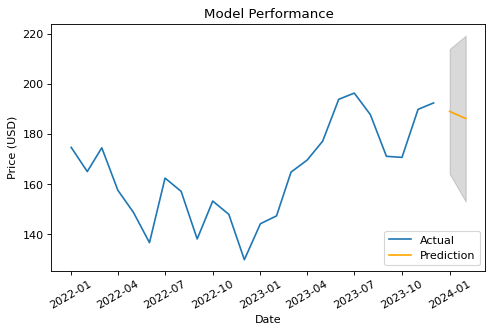

In [141]:
# Plot
plt.plot(data.AAPL)
plt.plot(dpx.price_predicted, color='orange')
plt.fill_between(dpx.index,
                 lower_int,
                 upper_int,
                 color='k', alpha=.15)
plt.title('Model Performance')
plt.legend(['Actual','Prediction'], loc='lower right')
plt.xlabel('Date')
plt.xticks(rotation=30)
plt.ylabel('Price (USD)')
plt.show()

In [142]:
# import evaluation matrices
from sklearn.metrics import mean_absolute_error

# Evaluate the model
print('ARIMAX MAE = ', mean_absolute_error(dpx.price_actual, dpx.price_predicted))

ARIMAX MAE =  2.9830404866150104


For further learning on time series models:<br>

* https://www.machinelearningplus.com/time-series/time-series-analysis-python/<br>
* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/


# Preparaing Data for ML Models

In [143]:
import yfinance as yf

In [144]:
data = yf.download("AAPL", start="2000-01-01", end="2022-05-31")
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400


In [145]:
data['Next_day'] = data['Close'].shift(-1)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Next_day
Date,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800,0.915179
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600,0.928571
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600,0.848214
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800,0.888393
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400,0.872768


#### Lets make this a classification task

In [146]:
# If the price next day was greater than previous day, we flag it as 1
data['Target'] = (data['Next_day'] > data['Close']).astype(int)
data.head()

,Open,High,Low,Close,Adj Close,Volume,Next_day,Target
Date,,,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.844981,535796800,0.915179,0
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.773741,512377600,0.928571,1
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.785063,778321600,0.848214,0
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.717125,767972800,0.888393,1
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.751094,460734400,0.872768,0


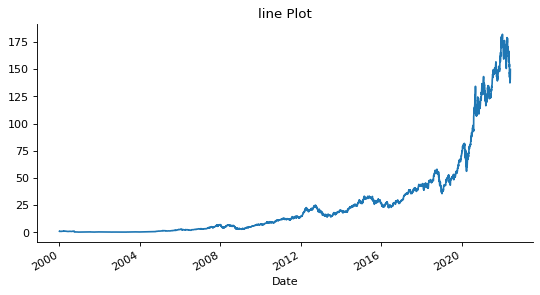

In [147]:
# Let's check the trend
from matplotlib import pyplot as plt
data['Close'].plot(kind='line', figsize=(8, 4), title='line Plot')
plt.gca().spines[['top', 'right']].set_visible(False)

### Let's train a XGBoost Model

In [148]:
# Train test split. Note, this is a time series data.
train = data.iloc[:-30]
test = data.iloc[-30:]

# Be carefull not to use the next_day feature
features = ['Open', 'High', 'Low', 'Close', 'Volume']

In [149]:
from xgboost import XGBClassifier

In [150]:
# Instantiate a model
model1 = XGBClassifier(max_depth=3, n_estimators=100, random_state=42)

In [151]:
# Train the baseline model
model1.fit(train[features], train['Target'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [152]:
# Make predictions
model1_preds = model1.predict(test[features])

# Convert numpy array to pandas series
model1_preds = pd.Series(model1_preds, index=test.index)

In [153]:
#model1_preds

In [154]:
# Evaluate the model
from sklearn.metrics import precision_score
precision_score(test['Target'], model1_preds)

0.5

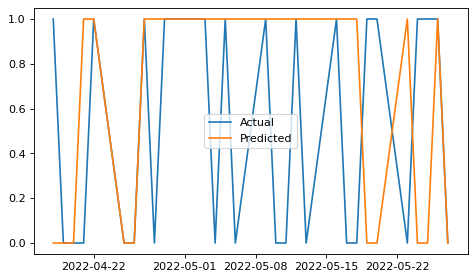

In [155]:
# Plot test['Target'] vs model1_preds
plt.plot(test['Target'], label='Actual')
plt.plot(model1_preds, label='Predicted')
plt.legend()
plt.show()

## Create a backtesting function

In [156]:
# First create a predict function
def predict(train, test, features, model):
  model.fit(train[features], train['Target'])
  model_preds = model.predict(test[features])
  model_preds = pd.Series(model_preds, index=test.index, name='predictions')
  combine = pd.concat([test['Target'], model_preds], axis=1)
  return combine

In [157]:
#data.head()

In [158]:
x = data.loc['2000-01-01':'2019-12-31']
x.shape

(5031, 8)

In [159]:
r = data.loc['2000-01-01':'2000-01-31']
r.shape

(20, 8)

In [160]:
# Create a backtest function
def backtest(data, model, features, start=5031, step=120):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[:i].copy()
    test = data.iloc[i:(i+step)].copy()
    model_preds = predict(train, test, features, model)
    all_predictions.append(model_preds)

  return pd.concat(all_predictions)


In [161]:
# backtest
predictions = backtest(data, model1, features)

In [162]:
predictions

,Target,predictions
Date,,
2020-01-02,0,1
2020-01-03,1,1
2020-01-06,0,1
2020-01-07,1,1
2020-01-08,1,1
...,...,...
2022-05-23,0,1
2022-05-24,1,0
2022-05-25,1,1


In [163]:
#Evaluate the model
precision_score(predictions['Target'], predictions['predictions'])

0.5081967213114754

In this example, we demonstrated the basic application of ARIMA and XGBoost models for stock price prediction using the APPL stock dataset with open, close, and volume features.

While our initial results may not have achieved high accuracy, this is not unexpected. Stock market predictions are notoriously challenging, and our simple model is just a starting point.

To improve the accuracy of our predictions, incorporate additional relevant features, such as technical indicators (e.g., moving averages, RSI), sentiment analysis, or economic indicators (e.g., GDP, inflation rate), relevant stock data.